In [2]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import json
# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

In [3]:
df_original = pd.read_csv('titles.csv')
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

df = df_original.copy()
df.info()
df.isnull().sum()
df['genres'] = df['genres'].str.strip("[]").str.replace("'", "")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

<Axes: xlabel='release_year'>

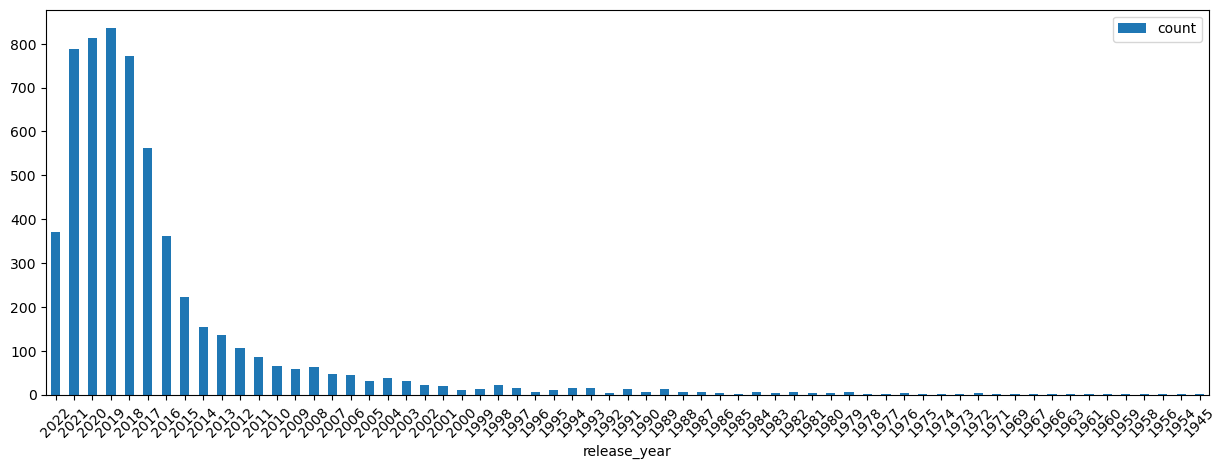

In [4]:

dfp = df['release_year'].value_counts().reset_index()
dfp.head()
dfp.sort_values('release_year',ascending = False).plot.bar(x='release_year', y='count', rot=45, figsize=(15,5))



In [5]:
#Based on the above plot, we can see that the most movies and TV- shows were produced from 2015 to 2022. 
#Therefore our data analysis will be based on movies and TV-shows released from 201 onwards
df_1522=df[df['release_year']>=2015]
df_1522.shape
df_1522['release_year'].unique()

array([2015, 2016, 2018, 2017, 2019, 2020, 2022, 2021], dtype=int64)

In [6]:
df_credits = pd.read_csv('credits.csv')

In [7]:
#Merge the two csv files on column id, as we are interested in the role column contained in df_credits
df_compo=pd.merge(df_1522,df_credits, how = 'left', on =['id'] )

directors = df_credits[df_credits['role']=='DIRECTOR']
directors.shape

df_compo=pd.merge(df_1522,directors, how = 'left', on =['id'] )
df_compo.shape
df_compo['id'].unique()
df_compo.head()


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts8,Better Call Saul,SHOW,Six years before Saul Goodman meets Walter Whi...,2015,TV-MA,49,"drama, crime",['US'],6.0,tt3032476,8.8,438575.0,273.296,8.500,NaN,NaN,NaN,NaN
1,ts37143,Alone,SHOW,Hardcore survivalists are put by themselves in...,2015,TV-MA,51,"reality, documentation",['US'],9.0,tt4803766,8.4,5037.0,26.930,7.000,NaN,NaN,NaN,NaN
2,ts38796,Stranger Things,SHOW,"When a young boy vanishes, a small town uncove...",2016,TV-14,61,"scifi, thriller, drama, fantasy, horror",['US'],5.0,tt4574334,8.7,1101055.0,2226.231,8.635,NaN,NaN,NaN,NaN
3,ts21867,Schitt's Creek,SHOW,Formerly filthy rich video store magnate Johnn...,2015,TV-14,22,comedy,['CA'],6.0,tt3526078,8.5,115758.0,25.254,7.600,NaN,NaN,NaN,NaN
4,ts41766,The Good Place,SHOW,"Eleanor Shellstrop, an ordinary woman who, thr...",2016,TV-14,23,"scifi, romance, comedy, drama, fantasy",['US'],4.0,tt4955642,8.2,152884.0,33.793,8.000,NaN,NaN,NaN,NaN


In [8]:
df.sort_values('imdb_score', ascending=False).head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2658,ts265844,#ABtalks,SHOW,#ABtalks is a YouTube interview show hosted by...,2018,TV-PG,68,,[],1.0,tt12635254,9.6,7.0,NaN,NaN
216,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,"drama, crime, thriller",['US'],5.0,tt0903747,9.5,1775990.0,353.848,8.79
564,ts160526,Khawatir,SHOW,A TV show devoted to help young people to be m...,2005,TV-14,19,reality,[],11.0,tt3062514,9.5,3115.0,NaN,NaN
3147,ts85398,Our Planet,SHOW,Experience our planet's natural beauty and exa...,2019,TV-G,50,documentation,['GB'],1.0,tt9253866,9.3,42259.0,19.942,8.80
233,ts3371,Avatar: The Last Airbender,SHOW,"In a war-torn world of elemental magic, a youn...",2005,TV-Y7,24,"scifi, animation, action, family, fantasy",['US'],3.0,tt0417299,9.3,303666.0,56.915,8.70


## Top 5 most frequent genres on Netflix platform from 2015 onwards

In [9]:
genres_top5produced=df_compo['genres'].value_counts(ascending=False).head(5)
genres_top5produced.reset_index()

,genres,count
0,comedy,467
1,documentation,358
2,drama,279
3,"comedy, drama",126
4,"drama, romance",123


<Axes: title={'center': 'Top 5 most frequent genres since 2015'}, xlabel='genres'>

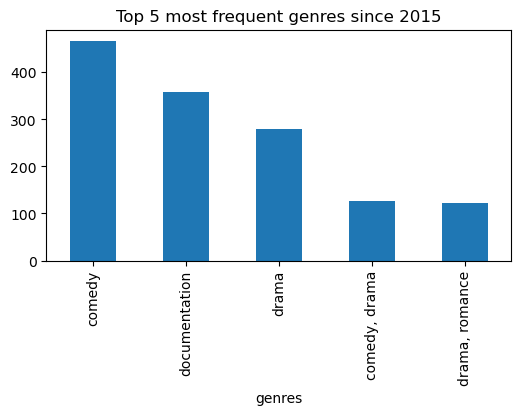

In [10]:
top5_produced=df_compo['genres'].value_counts().head(5)
top5_produced
plt.figure(figsize = (6,3))
top5_produced.plot(kind = 'bar', title = 'Top 5 most frequent genres since 2015')

## Most popular genres by IMDB score

In [11]:
#Genre popularity by IMDB Score

most_popular_genres = df_compo.groupby('genres')['imdb_score'].mean().sort_values(ascending=False)
type(most_popular_genres)


pandas.core.series.Series

In [12]:
imdb8=pd.DataFrame(most_popular_genres).head(10)
imdb8

,imdb_score
genres,
"scifi, action, drama, animation, fantasy",9.0
"action, drama, thriller, romance, comedy, fantasy, horror",8.8
"animation, action, drama, war, history",8.8
"scifi, action, animation, horror, fantasy, thriller",8.7
"drama, comedy, animation",8.7
"comedy, drama, music, reality",8.7
"scifi, crime, drama, thriller",8.7
"action, animation, comedy, fantasy, scifi, horror, drama",8.7
"drama, history, romance, war, action",8.7


In [34]:
imdb8=imdb8[imdb8['imdb_score']>=8]
imdb8 = imdb8[imdb8['imdb_score'] >= 8]
imdb8.reset_index().head(10)


,genres,imdb_score
0,"scifi, action, drama, animation, fantasy",9.0
1,"action, drama, thriller, romance, comedy, fant...",8.8
2,"animation, action, drama, war, history",8.8
3,"scifi, action, animation, horror, fantasy, thr...",8.7
4,"drama, comedy, animation",8.7
5,"comedy, drama, music, reality",8.7
6,"scifi, crime, drama, thriller",8.7
7,"action, animation, comedy, fantasy, scifi, hor...",8.7
8,"drama, history, romance, war, action",8.7
9,"scifi, thriller, drama, fantasy, horror",8.7


In [35]:
dfimdb = df_compo.groupby('genres')[['imdb_score']].mean().sort_values('imdb_score',ascending = False).reset_index()
dfimdb8 = dfimdb[dfimdb['imdb_score']>= 8]
dfimdb8.head(10)
genreslist = dfimdb8['genres'].to_list()

In [36]:
genreslist[0:2]

['scifi, action, drama, animation, fantasy',
 'action, drama, thriller, romance, comedy, fantasy, horror']

In [37]:
l=[]
for element in genreslist:
    l.extend(element.split(','))
#l

In [38]:
uniquegenres = list(set(l))
uniquegenres

['romance',
 ' animation',
 ' family',
 'animation',
 ' crime',
 ' reality',
 'documentation',
 ' war',
 'comedy',
 ' fantasy',
 ' comedy',
 ' european',
 ' sport',
 ' scifi',
 ' drama',
 'action',
 ' horror',
 'music',
 'scifi',
 'drama',
 ' thriller',
 ' music',
 ' documentation',
 'reality',
 'crime',
 ' romance',
 'thriller',
 ' action',
 'war',
 ' history',
 'fantasy']

In [39]:
d={}
for g in uniquegenres:
    d[g] = l.count(g)

In [41]:
genresfrequency = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse = True)}
genresfrequency 

{' drama': 53,
 ' fantasy': 43,
 ' comedy': 37,
 ' thriller': 36,
 ' action': 35,
 ' animation': 25,
 ' romance': 24,
 'drama': 23,
 ' horror': 19,
 ' scifi': 18,
 'scifi': 18,
 ' family': 17,
 ' crime': 15,
 ' history': 14,
 'comedy': 13,
 'animation': 11,
 'action': 9,
 ' documentation': 8,
 ' european': 7,
 'documentation': 6,
 ' reality': 5,
 ' war': 5,
 ' sport': 5,
 ' music': 5,
 'reality': 3,
 'crime': 3,
 'war': 3,
 'fantasy': 3,
 'romance': 2,
 'thriller': 2,
 'music': 1}

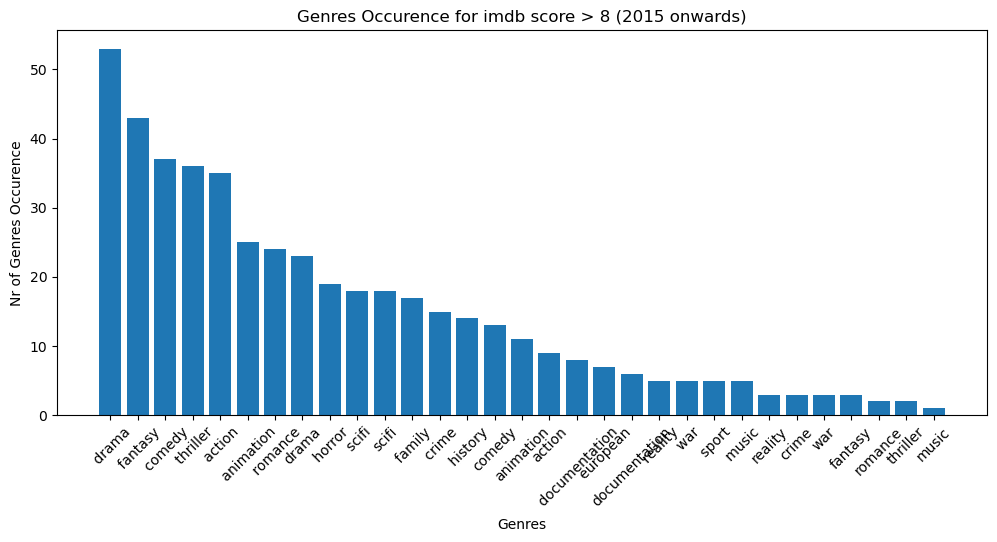

In [64]:
plt.figure(figsize=(12,5))
plt.title('Genres Occurence for imdb score > 8 (2015 onwards)')
plt.xlabel('Genres')
plt.ylabel('Nr of Genres Occurence')
plt.bar(genresfrequency.keys(),genresfrequency.values())
plt.xticks(rotation=45)
None

# Break down and analysis for type column (movies/tv shows)

### Percentation of Netflix Titles that are either Movies or TV Shows/Netflix sources distribution

In [14]:
prod_show = df_compo[df_compo['type'] =='SHOW'].count()
prod_show=df_compo[df_compo['type']=='SHOW']
prod_show['id'].count()

1954

In [15]:
prod_movie = df_compo[df_compo['type'] =='MOVIE'].count()
prod_movie=df_compo[df_compo['type']=='MOVIE']
prod_movie['id'].count()

3216

<Axes: ylabel='count'>

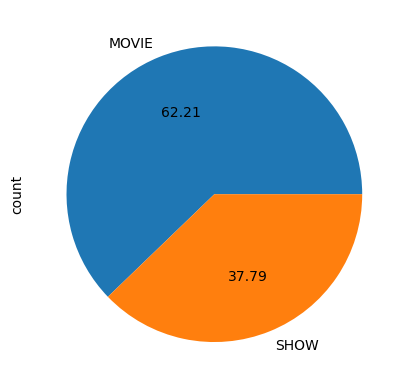

In [16]:
df_compo['type'].value_counts().plot(kind='pie',autopct='%.2f')

In [17]:
#So there are 3216 movies and 1954 TV shows, with movies being the majority. 
#There are far more movie titles (62,21%) that TV shows titles (37,79%) in terms of title.

In [18]:
imdb_type = df_compo.groupby('type')['imdb_score'].mean().sort_values(ascending=False)
imdb_type


type
SHOW     6.924409
MOVIE    6.149639
Name: imdb_score, dtype: float64

### Most popular directors based on IMDB score

In [20]:
#Top 10 Director based on the imdb score.
rate_directors = df_compo.dropna(subset = 'role').sort_values(by=['imdb_score', 'name'], ascending=False)
rate_directors[['name', 'imdb_score']].head(10)
top10_directors = rate_directors[['name', 'imdb_score', 'title', 'type']].head(10)
top10_directors

,name,imdb_score,title,type
141,Shin Won-ho,9.2,Reply 1988,SHOW
3957,Sashi Kiran Tikka,9.1,Major,MOVIE
2101,Jason Hehir,9.1,The Last Dance,SHOW
1542,Venkatesh Maha,8.9,C/o Kancharapalem,MOVIE
2316,Keith Scholey,8.9,David Attenborough: A Life on Our Planet,MOVIE
2317,Jonathan Hughes,8.9,David Attenborough: A Life on Our Planet,MOVIE
2318,Alastair Fothergill,8.9,David Attenborough: A Life on Our Planet,MOVIE
2257,Steve Cheng,8.8,The Untamed,SHOW
2256,Ka-Lam Chan,8.8,The Untamed,SHOW
4524,Han Dong-hwa,8.8,Navillera,SHOW


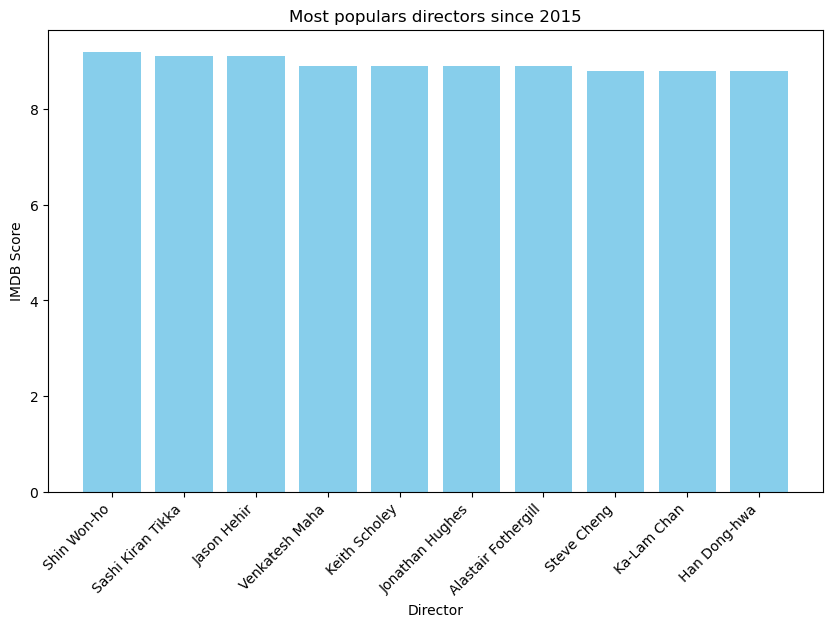

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(top10_directors['name'], top10_directors['imdb_score'], color='skyblue')
plt.xlabel('Director')
plt.ylabel('IMDB Score')
plt.title('Most populars directors since 2015')
plt.xticks(rotation=45, ha='right')
plt.show()

#The most popular directors on Netflix, are mainly international,but very well known series/films

# Duration (movies) and number of seasons (TV shows) analysis

In [43]:
prod_show.isnull().sum()
#prod_show

id                         0
title                      0
type                       0
description                8
release_year               0
age_certification        253
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                  155
imdb_score               176
imdb_votes               176
tmdb_popularity           18
tmdb_score                83
person_id               1342
name                    1342
character               1954
role                    1342
dtype: int64

In [44]:
seasons_count = prod_show['seasons'].value_counts()
seasons_count = seasons_count.reset_index()
seasons_count

,seasons,count
0,1.0,1265
1,2.0,376
2,3.0,160
3,4.0,79
4,5.0,43
5,6.0,20
6,7.0,6
7,9.0,2
8,8.0,2
9,11.0,1


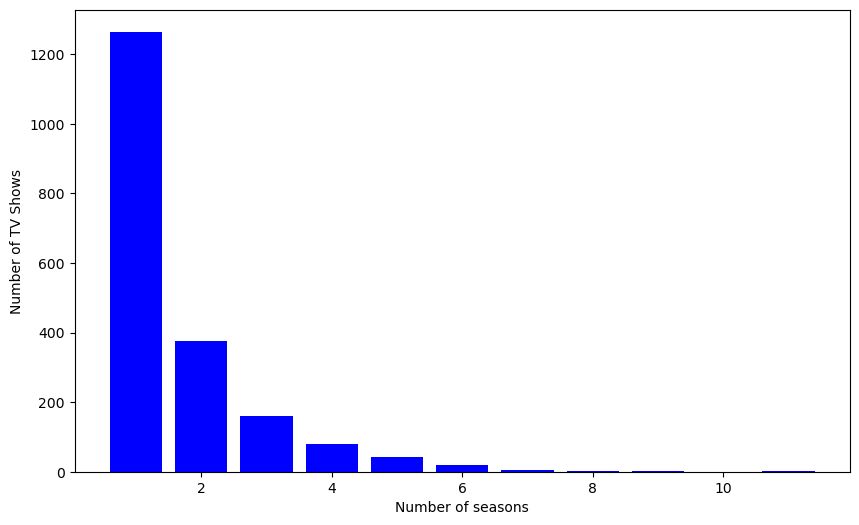

In [45]:
plt.figure(figsize=(10, 6))
plt.bar(seasons_count['seasons'], seasons_count['count'], color='blue')
plt.xlabel('Number of seasons')
plt.ylabel('Number of TV Shows')
plt.show()

#The majority of TV shows ran for 1 season.

### Top10 TV shows with the highest IMDB score

In [46]:
df_temp_shows=prod_show.groupby('title').mean(['imdb_score']).sort_values('imdb_score', ascending=False).head(10).reset_index()

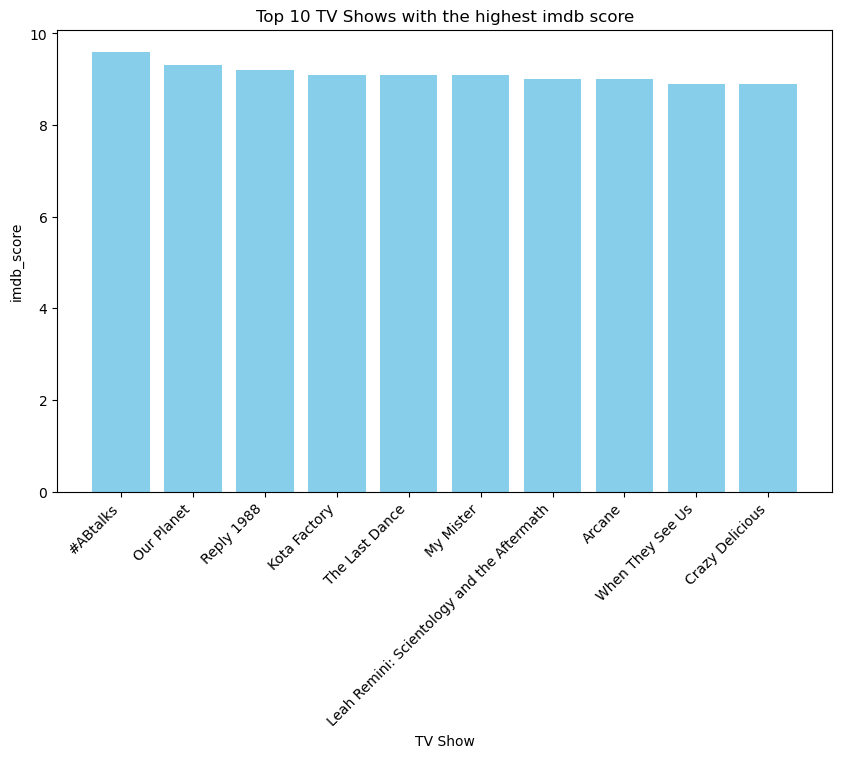

In [47]:
plt.figure(figsize=(10, 6))
plt.bar(df_temp_shows['title'], df_temp_shows['imdb_score'], color='skyblue')
plt.xlabel('TV Show')
plt.ylabel('imdb_score')
plt.title('Top 10 TV Shows with the highest imdb score')
plt.xticks(rotation=45, ha='right')
plt.show()

### Top 10 movies with the highest IMDB score

In [60]:
df_temp_movies1=prod_movie.groupby('title').mean(['imdb_score']).sort_values('imdb_score', ascending=False).head(10).reset_index()
df_temp_movies1
#df_temp=prod_movie.groupby('title').mean(['imdb_score']).sort_values('imdb_score', ascending=False).head(10).reset_index()

,title,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
0,Major,2022.0,149.0,NaN,9.1,7576.0,6.429,8.188,937765.0
1,C/o Kancharapalem,2018.0,152.0,NaN,8.9,6842.0,2.145,7.600,951125.0
2,David Attenborough: A Life on Our Planet,2020.0,83.0,NaN,8.9,31625.0,15.935,8.500,488599.0
3,Bo Burnham: Inside,2021.0,87.0,NaN,8.7,44074.0,11.434,8.200,308.0
4,In Our Mothers' Gardens,2021.0,84.0,NaN,8.6,132.0,2.079,NaN,1904729.0
5,The Art of Incarceration,2019.0,90.0,NaN,8.6,25.0,0.664,NaN,2418135.0
6,Rubaru Roshni,2019.0,110.0,NaN,8.6,591.0,1.489,7.700,NaN
7,Merku Thodarchi Malai,2018.0,122.0,NaN,8.6,1818.0,2.158,7.400,230796.0
8,"Best Wishes, Warmest Regards: A Schitt's Creek...",2020.0,44.0,NaN,8.6,1445.0,3.016,8.900,1396414.0
9,A Second Chance,2015.0,130.0,NaN,8.6,47.0,2.752,7.100,141692.0


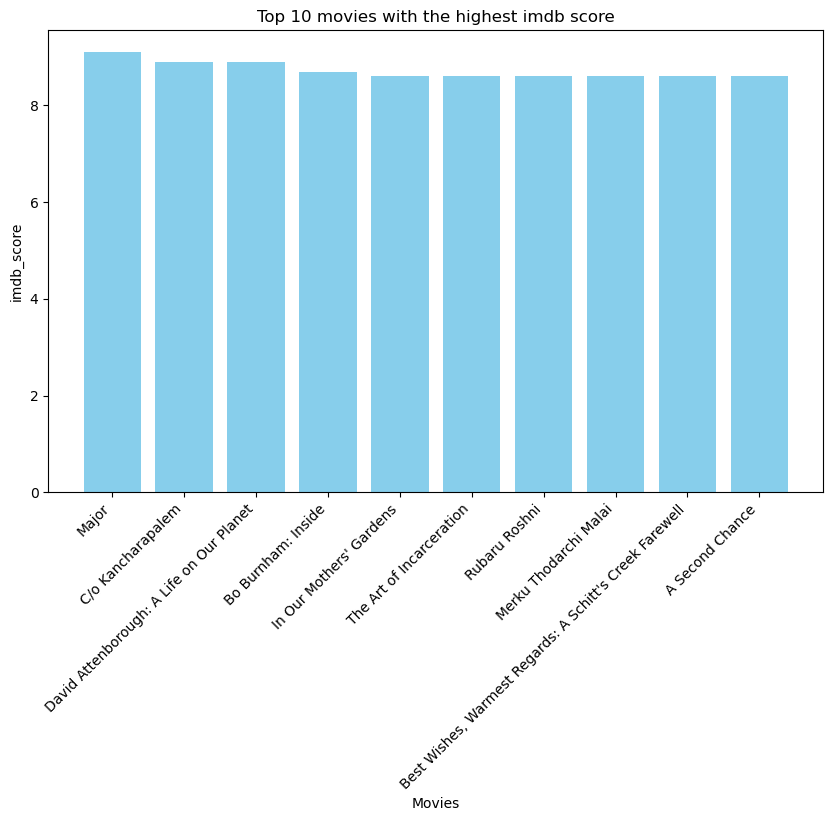

In [61]:
plt.figure(figsize=(10, 6))
plt.bar(df_temp_movies1['title'], df_temp_movies1['imdb_score'], color='skyblue')
plt.xlabel('Movies')
plt.ylabel('imdb_score')
plt.title('Top 10 movies with the highest imdb score')
plt.xticks(rotation=45, ha='right')
plt.show()

### Top10 movies with the highset runtime based on IMDB score

In [62]:
df_temp_movies = prod_movie.groupby('title').mean(['imdb_score']).sort_values('runtime', ascending=False).head(10).reset_index()
df_temp_movies.head(10)

,title,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
0,The Irishman,2019.0,209.0,NaN,7.8,376379.0,21.075,7.600,3308.0
1,Jab Harry Met Sejal,2017.0,200.0,NaN,5.0,20593.0,8.529,6.500,53156.0
2,The Hateful Eight,2015.0,188.0,NaN,7.8,570138.0,26.531,7.737,2266.0
3,RRR,2022.0,187.0,NaN,8.0,87515.0,53.526,7.800,45443.0
4,Manu,2018.0,182.0,NaN,7.6,1081.0,1.400,7.000,957377.0
5,This Earth of Mankind,2019.0,181.0,NaN,6.8,747.0,2.346,7.300,66049.0
6,4K Fireplace,2015.0,181.0,NaN,7.7,49.0,0.738,6.800,NaN
7,Zero,2018.0,180.0,NaN,5.2,27346.0,6.890,5.300,124579.0
8,Jagga Jasoos,2017.0,180.0,NaN,6.3,10283.0,6.005,6.000,202602.0
9,How I Fell in Love with a Gangster,2022.0,179.0,NaN,6.0,2248.0,29.595,6.700,1122250.0


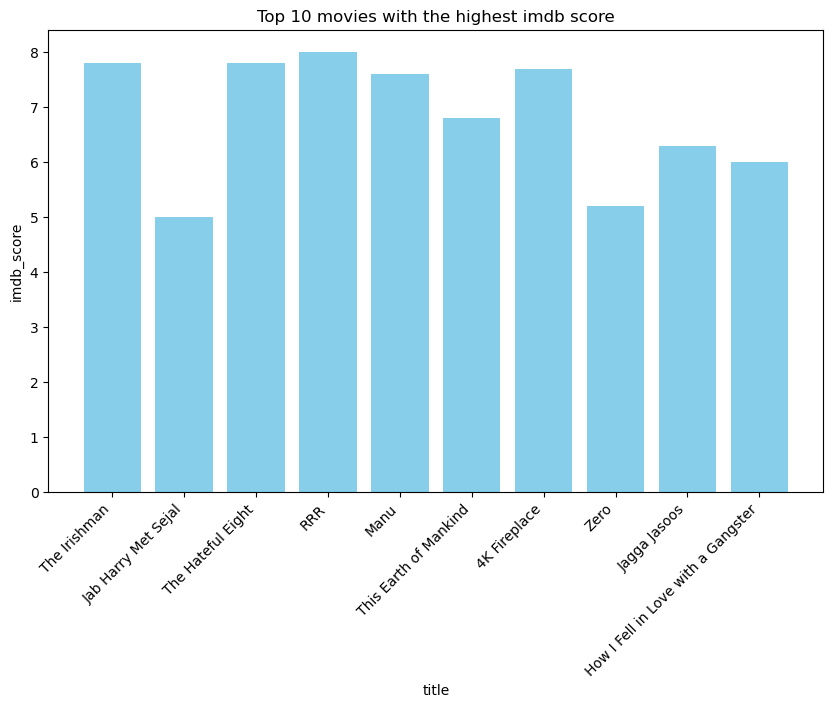

In [63]:
plt.figure(figsize=(10, 6))
plt.bar(df_temp_movies['title'], df_temp_movies['imdb_score'], color='skyblue')
plt.xlabel('title')
plt.ylabel('imdb_score')
plt.title('Top 10 movies with the highest imdb score')
plt.xticks(rotation=45, ha='right')
plt.show()


# we can see that the movies with a runtime of about 180 minutes have an imdb score between 6.5 and 8, therefore Neftlix may need to invest in creating movies
#with less than 180 minutes runtime

In [54]:
df_temp_movies[df_temp_movies['runtime']>120]
df_temp_movies_120 = prod_movie.groupby('title').mean(['imdb_score']).sort_values('runtime', ascending=False).reset_index()
df_temp_movies_120 = df_temp_movies_120[df_temp_movies_120['runtime']>120]
count_scores_120 = [df_temp_movies_120['imdb_score'].unique()]
df_temp_movies_120['title'].count()

441

In [56]:
df_temp_movies_180 = prod_movie.groupby('title').mean(['imdb_score']).sort_values('runtime', ascending=False).reset_index()
df_temp_movies_180 = df_temp_movies_180[df_temp_movies_180['runtime']>180]
count_scores_180 = [df_temp_movies_180['imdb_score'].unique()]
df_temp_movies_180['title']

0             The Irishman
1      Jab Harry Met Sejal
2        The Hateful Eight
3                      RRR
4                     Manu
5    This Earth of Mankind
6             4K Fireplace
Name: title, dtype: object

In [30]:
"""Useful insights
The popular streaming platform started gaining traction after 2015. Since then, the amount of
content added has been increasing significantly. Therefore, we performed analysis on data
acquired from 2015 onwards.

Our analysis showed that comedies and documentaries take the top two spots, whereas the
bottom three positions are occupied by genres such as drama, comedy-drama and drama-
romance movies and TV shows.

We analysed the distribution of movie &amp; TV-shows genres and their impact on the IMDB score.
The top 10 most common genres are drama, fantasy, comedy, thriller, action, animation,
romance, drama, horror and sci-fi.
We concluded that content creators working for Netflix should continue producing drama,
comedy and romance movies/TV-shows, with a focus on drama genre as this is associated with
high IMDB scores; fantasy, thriller and action movies should be carefully considered for
production.
Approximately 62% of the titles available on Netflix belong to the category of movies, while only
around 38% fall under the TV shows category
The most popular directors on Netflix, are mainly international, but their productions are very
well -known series/films.
We found the top 10 of TV-shows and the top 10 of movies, based on their IMDB score.
The majority of the TV-shows available on Netflix, ran for 1 season. Only a few TV shows
extend beyond a single season.
We observe that the movies with a runtime of about 180 minutes have an IMDB score between
6.5 and 8, therefore Neftlix may need to invest in creating movies with less than 180 minutes
runtime.

Conclusion
Based on this analysis we concluded the following:
Netflix content is based more on movies, than TV Shows.
The majority of titles are Dramas.
The majority of popular movies keep us in front of the screen for more than 120 minutes and TV
Shows have only one season.
International directors based on IMDB scores stand out in film and TV-shows production.
Netflix started gaining traction after 2015."""


'Conclusions\n\nThe most content type on Netflix is movies.\nThe popular streaming platform started gaining traction after 2015. Since then, the amount of content added has been increasing significantly.\nThe most popular director on Netflix , with titles that have the highest mean imdb score,are international; Shin Won-ho for TV-shows and Sashi Kiran Tikka for movies.\nInternational Movies is a genre that is mostly in Netflix.'